**KELOMPOK 10<br>**
Dwi Ahmad Dzulhijjah<br>
Muhammad NurKholis Majid<br>
Almi Yulistia Alwanda<br>
Fariz Zakaria<br>
Dimas Candra Kusuma<br><br>



**FIRE DANGER RATING SISTEM**<br>
Importing libraries


## AKUISISI DATA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

LOADING AND REVIEWING DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MTI/Data Science/Paper/FDRS-KBJ-1-6.csv")
df.shape

(7779, 10)

In [ ]:
df.head(100)

,Date,Temp Out,Humidity Out,Wind Speed,sum RainFall,RainDescription,Soil Moisture,Soil Temp,FDRS Index,FDRS Status
0,1/25/2023 0:30,23.4,96,6.4,10.8,Ringan,3,27.8,0.307216,Sedang
1,1/25/2023 1:00,23.2,97,4.8,20.8,Sedang,3,27.2,0.285714,Rendah
2,1/25/2023 1:30,23.2,98,1.6,1.4,Sangat Ringan,3,27.2,0.250505,Rendah
3,1/25/2023 10:00,26.1,88,3.2,0.0,Tidak Hujan,3,26.7,0.329213,Tinggi
4,1/25/2023 10:30,26.1,90,3.2,0.0,Tidak Hujan,3,26.7,0.321978,Tinggi
...,...,...,...,...,...,...,...,...,...,...
95,1/26/2023 9:30,23.6,96,1.6,0.2,Sangat Ringan,3,25.6,0.259794,Rendah
96,1/27/2023 0:00,23.5,96,1.6,0.0,Tidak Hujan,4,26.1,0.258763,Rendah
97,1/27/2023 0:30,23.4,97,0.0,0.0,Tidak Hujan,4,26.1,0.238776,Rendah
98,1/27/2023 1:00,23.2,97,0.0,0.0,Tidak Hujan,4,26.1,0.236735,Rendah


In [ ]:
df.tail(100)

,Date,Temp Out,Humidity Out,Wind Speed,sum RainFall,RainDescription,Soil Moisture,Soil Temp,FDRS Index,FDRS Status
7679,6/6/2023 10:00,31.2,84,0.0,0.0,Tidak Hujan,7,31.7,0.367059,Extreme
7680,6/6/2023 10:30,29.4,89,1.6,0.0,Tidak Hujan,7,31.7,0.344444,Extreme
7681,6/6/2023 11:00,28.5,91,0.0,0.0,Tidak Hujan,7,31.7,0.309783,Sedang
7682,6/6/2023 11:30,27.8,94,0.0,0.0,Tidak Hujan,7,31.1,0.292632,Rendah
7683,6/6/2023 12:00,27.4,94,0.0,0.0,Tidak Hujan,7,31.1,0.288421,Rendah
...,...,...,...,...,...,...,...,...,...,...
7774,6/8/2023 0:30,25.9,95,0.0,0.0,Tidak Hujan,9,27.2,0.269792,Rendah
7775,6/8/2023 1:00,27.4,91,1.6,0.0,Tidak Hujan,9,27.2,0.315217,Sedang
7776,6/8/2023 1:30,28.4,86,1.6,0.0,Tidak Hujan,9,27.2,0.344828,Extreme
7777,6/8/2023 2:00,29.6,82,1.6,0.0,Tidak Hujan,9,27.8,0.375904,Extreme


## LSTM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
# Memuat dataset
dataset = df.copy()

# Mengubah kolom Date menjadi tipe data datetime
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Mengurutkan dataset berdasarkan kolom Date
dataset = dataset.sort_values('Date')

# Memilih fitur yang akan digunakan untuk prediksi
features = ['Temp Out', 'Humidity Out', 'Wind Speed', 'sum RainFall', 'Soil Moisture', 'FDRS Index']

# Mengambil data yang akan digunakan
data = dataset[features].values

# Normalisasi data ke rentang 0-1
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Menentukan jumlah timestep dan fitur
timesteps = 10  # Jumlah data sebelumnya yang akan digunakan untuk prediksi
n_features = len(features)

# Membuat dataset terpisah untuk pelatihan dan pengujian
train_size = int(len(data_scaled) * 0.8)  # 80% data untuk pelatihan
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

# Membagi data menjadi input dan output
def create_sequences(data, timesteps):
    X = []
    y = []
    for i in range(len(data) - timesteps):
        X.append(data[i:i + timesteps])
        y.append(data[i + timesteps])
    return np.array(X), np.array(y)

train_X, train_y = create_sequences(train_data, timesteps)
test_X, test_y = create_sequences(test_data, timesteps)

# Membangun model LSTM
model = Sequential()
model.add(LSTM(64, input_shape=(timesteps, n_features)))
model.add(Dense(n_features))
model.compile(loss='mean_squared_error', optimizer='adam')

# Melatih model
history_LSTM = model.fit(train_X, train_y,validation_data=(test_X, test_y), epochs=100, batch_size=32, verbose=1)

# Memprediksi data pengujian
predicted = model.predict(test_X)

# Mengembalikan data ke skala aslinya
predicted = scaler.inverse_transform(predicted)

Epoch 1/100
195/195 [==============================] - 5s 12ms/step - loss: 0.0174 - val_loss: 0.0036
Epoch 2/100
195/195 [==============================] - 2s 10ms/step - loss: 0.0042 - val_loss: 0.0029
Epoch 3/100
195/195 [==============================] - 2s 11ms/step - loss: 0.0036 - val_loss: 0.0025
Epoch 4/100
195/195 [==============================] - 2s 10ms/step - loss: 0.0032 - val_loss: 0.0021
Epoch 5/100
195/195 [==============================] - 3s 13ms/step - loss: 0.0030 - val_loss: 0.0020
Epoch 6/100
195/195 [==============================] - 3s 14ms/step - loss: 0.0029 - val_loss: 0.0019
Epoch 7/100
195/195 [==============================] - 4s 20ms/step - loss: 0.0028 - val_loss: 0.0019
Epoch 8/100
195/195 [==============================] - 2s 11ms/step - loss: 0.0027 - val_loss: 0.0019
Epoch 9/100
195/195 [==============================] - 2s 9ms/step - loss: 0.0027 - val_loss: 0.0018
Epoch 10/100
195/195 [==============================] - 2s 11ms/step - loss: 0.0027

### SIMPAN PERFORMA

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [ ]:
# Create a dataframe to store the evaluation results
results = pd.DataFrame(columns=['Algorithm',
                                'MAE',
                                'MSE',
                                'RMSE',
                                'CV Predicted',
                                'CV Actual'])

In [ ]:
# Assuming you have the actual test data and predicted values for LSTM
lstm_actual = test_data[timesteps:]
lstm_predicted = predicted

lstm_std_act = np.std(lstm_actual)
lstm_std_pred = np.std(lstm_predicted)

# Calculate evaluation metrics for LSTM
lstm_mae = mean_absolute_error(lstm_actual, lstm_predicted)
lstm_mse = mean_squared_error(lstm_actual, lstm_predicted)
lstm_rmse = math.sqrt(lstm_mse)

lstm_cv_actual = lstm_std_act / lstm_actual.mean()
lstm_cv_predicted = lstm_std_pred / lstm_predicted.mean()

# Add LSTM results to the dataframe
results.loc[0] = ['LSTM',
                  lstm_mae,
                  lstm_mse,
                  lstm_rmse,
                  lstm_cv_predicted,lstm_cv_actual]

# Display the results
print(results)

  Algorithm        MAE          MSE       RMSE  CV Predicted  CV Actual
0      LSTM  20.810256  1513.353298  38.901842      1.572647   1.030476


## GRU-LSTM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, LSTM, Dense

In [ ]:
# Memuat dataset
dataset = df.copy()

# Mengubah kolom Date menjadi tipe data datetime
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Mengurutkan dataset berdasarkan kolom Date
dataset = dataset.sort_values('Date')

# Memilih fitur yang akan digunakan untuk prediksi
features = ['Temp Out', 'Humidity Out', 'Wind Speed', 'sum RainFall', 'Soil Moisture', 'FDRS Index']

# Mengambil data yang akan digunakan
data = dataset[features].values

# Normalisasi data ke rentang 0-1
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Menentukan jumlah timestep dan fitur
timesteps = 10  # Jumlah data sebelumnya yang akan digunakan untuk prediksi
n_features = len(features)

# Membuat dataset terpisah untuk pelatihan dan pengujian
train_size = int(len(data_scaled) * 0.8)  # 80% data untuk pelatihan
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

# Membagi data menjadi input dan output
def create_sequences(data, timesteps):
    X = []
    y = []
    for i in range(len(data) - timesteps):
        X.append(data[i:i + timesteps])
        y.append(data[i + timesteps])
    return np.array(X), np.array(y)

train_X, train_y = create_sequences(train_data, timesteps)
test_X, test_y = create_sequences(test_data, timesteps)

# Membangun model GRU-LSTM
model = Sequential()
model.add(GRU(64, return_sequences=True, input_shape=(timesteps, n_features)))
model.add(LSTM(64))
model.add(Dense(n_features))
model.compile(loss='mean_squared_error', optimizer='adam')

# Melatih model
history_GRU_LSTM = model.fit(train_X, train_y, epochs=100, batch_size=32, verbose=1)

# Memprediksi data pengujian
predicted = model.predict(test_X)

# Mengembalikan data ke skala aslinya
predicted = scaler.inverse_transform(predicted)

Epoch 1/100
195/195 [==============================] - 9s 16ms/step - loss: 0.0132
Epoch 2/100
195/195 [==============================] - 3s 16ms/step - loss: 0.0037
Epoch 3/100
195/195 [==============================] - 3s 15ms/step - loss: 0.0031
Epoch 4/100
195/195 [==============================] - 5s 23ms/step - loss: 0.0029
Epoch 5/100
195/195 [==============================] - 3s 17ms/step - loss: 0.0028
Epoch 6/100
195/195 [==============================] - 3s 16ms/step - loss: 0.0027
Epoch 7/100
195/195 [==============================] - 3s 15ms/step - loss: 0.0027
Epoch 8/100
195/195 [==============================] - 4s 19ms/step - loss: 0.0027
Epoch 9/100
195/195 [==============================] - 4s 20ms/step - loss: 0.0027
Epoch 10/100
195/195 [==============================] - 3s 16ms/step - loss: 0.0026
Epoch 11/100
195/195 [==============================] - 3s 15ms/step - loss: 0.0026
Epoch 12/100
195/195 [==============================] - 3s 17ms/step - loss: 0.0026
E

In [ ]:
# Assuming you have the actual test data and predicted values for LSTM
GRU_lstm_actual = test_data[timesteps:]
GRU_lstm_predicted = predicted

GRU_lstm_std_act = np.std(GRU_lstm_actual)
GRU_lstm_std_pred = np.std(GRU_lstm_predicted)

# Calculate evaluation metrics for LSTM
GRU_lstm_mae = mean_absolute_error(GRU_lstm_actual, GRU_lstm_predicted)
GRU_lstm_mse = mean_squared_error(GRU_lstm_actual, GRU_lstm_predicted)
GRU_lstm_rmse = math.sqrt(GRU_lstm_mse)

GRU_lstm_cv_actual = GRU_lstm_std_act / GRU_lstm_actual.mean()
GRU_lstm_cv_predicted = GRU_lstm_std_pred / GRU_lstm_predicted.mean()

# Add LSTM results to the dataframe
results.loc[1] = ['GRU-LSTM',
                  GRU_lstm_mae,
                  GRU_lstm_mse,
                  GRU_lstm_rmse,
                  GRU_lstm_cv_predicted,GRU_lstm_cv_actual]

# Display the results
print(results)

  Algorithm        MAE          MSE       RMSE  CV Predicted  CV Actual
0      LSTM  20.810256  1513.353298  38.901842      1.572647   1.030476
1  GRU-LSTM  20.762499  1500.318800  38.733949      1.567902   1.030476


## CNN-LSTM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense

In [ ]:
# Memuat dataset
dataset = df.copy()

# Mengubah kolom Date menjadi tipe data datetime
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Mengurutkan dataset berdasarkan kolom Date
dataset = dataset.sort_values('Date')

# Memilih fitur yang akan digunakan untuk prediksi
features = ['Temp Out', 'Humidity Out', 'Wind Speed', 'sum RainFall', 'Soil Moisture', 'FDRS Index']

# Mengambil data yang akan digunakan
data = dataset[features].values

# Normalisasi data ke rentang 0-1
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Menentukan jumlah timestep dan fitur
timesteps = 10  # Jumlah data sebelumnya yang akan digunakan untuk prediksi
n_features = len(features)

# Membuat dataset terpisah untuk pelatihan dan pengujian
train_size = int(len(data_scaled) * 0.8)  # 80% data untuk pelatihan
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

# Membagi data menjadi input dan output
def create_sequences(data, timesteps):
    X = []
    y = []
    for i in range(len(data) - timesteps):
        X.append(data[i:i + timesteps])
        y.append(data[i + timesteps])
    return np.array(X), np.array(y)

train_X, train_y = create_sequences(train_data, timesteps)
test_X, test_y = create_sequences(test_data, timesteps)

# Membangun model CNN-LSTM
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(timesteps, n_features)))
model.add(MaxPooling1D(2))
model.add(LSTM(64))
model.add(Dense(n_features))
model.compile(loss='mean_squared_error', optimizer='adam')

# Melatih model
history_CNN_LSTM = model.fit(train_X, train_y, epochs=100, batch_size=32, verbose=1)

# Memprediksi data pengujian
predicted = model.predict(test_X)

# Mengembalikan data ke skala aslinya
predicted = scaler.inverse_transform(predicted)

# Menghitung rata-rata kesalahan absolut (Mean Absolute Error)
#mae = np.mean(np.abs(test_data[timesteps:] - predicted))
#print('Mean Absolute Error:', mae)

Epoch 1/100
195/195 [==============================] - 3s 5ms/step - loss: 0.0141
Epoch 2/100
195/195 [==============================] - 1s 6ms/step - loss: 0.0044
Epoch 3/100
195/195 [==============================] - 1s 7ms/step - loss: 0.0037
Epoch 4/100
195/195 [==============================] - 2s 10ms/step - loss: 0.0035
Epoch 5/100
195/195 [==============================] - 2s 9ms/step - loss: 0.0033
Epoch 6/100
195/195 [==============================] - 1s 6ms/step - loss: 0.0032
Epoch 7/100
195/195 [==============================] - 1s 6ms/step - loss: 0.0031
Epoch 8/100
195/195 [==============================] - 1s 6ms/step - loss: 0.0030
Epoch 9/100
195/195 [==============================] - 1s 5ms/step - loss: 0.0030
Epoch 10/100
195/195 [==============================] - 1s 6ms/step - loss: 0.0029
Epoch 11/100
195/195 [==============================] - 1s 6ms/step - loss: 0.0029
Epoch 12/100
195/195 [==============================] - 1s 6ms/step - loss: 0.0029
Epoch 13/100

In [ ]:
# Assuming you have the actual test data and predicted values for LSTM
CNN_lstm_actual = test_data[timesteps:]
CNN_lstm_predicted = predicted

CNN_lstm_std_act = np.std(CNN_lstm_actual)
CNN_lstm_std_pred = np.std(CNN_lstm_predicted)

# Calculate evaluation metrics for LSTM
CNN_lstm_mae = mean_absolute_error(CNN_lstm_actual, CNN_lstm_predicted)
CNN_lstm_mse = mean_squared_error(CNN_lstm_actual, CNN_lstm_predicted)
CNN_lstm_rmse = math.sqrt(CNN_lstm_mse)

CNN_lstm_cv_actual = CNN_lstm_std_act / CNN_lstm_actual.mean()
CNN_lstm_cv_predicted = CNN_lstm_std_pred / CNN_lstm_predicted.mean()

# Add LSTM results to the dataframe
results.loc[2] = ['CNN-LSTM',
                  CNN_lstm_mae,
                  CNN_lstm_mse,
                  CNN_lstm_rmse,
                  CNN_lstm_cv_predicted,CNN_lstm_cv_actual]

# Display the results
print(results)

  Algorithm        MAE          MSE       RMSE  CV Predicted  CV Actual
0      LSTM  20.810256  1513.353298  38.901842      1.572647   1.030476
1  GRU-LSTM  20.762499  1500.318800  38.733949      1.567902   1.030476
2  CNN-LSTM  20.878202  1515.864625  38.934106      1.565666   1.030476


## BI-LSTM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM , Dense

# Memuat dataset
dataset = df.copy()

# Mengubah kolom Date menjadi tipe data datetime
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Mengurutkan dataset berdasarkan kolom Date
dataset = dataset.sort_values('Date')

# Memilih fitur yang akan digunakan untuk prediksi
features = ['Temp Out', 'Humidity Out', 'Wind Speed', 'sum RainFall', 'Soil Moisture', 'FDRS Index']

# Mengambil data yang akan digunakan
data = dataset[features].values

# Normalisasi data ke rentang 0-1
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Menentukan jumlah timestep dan fitur
timesteps = 10  # Jumlah data sebelumnya yang akan digunakan untuk prediksi
n_features = len(features)

# Membuat dataset terpisah untuk pelatihan dan pengujian
train_size = int(len(data_scaled) * 0.8)  # 80% data untuk pelatihan
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

# Membagi data menjadi input dan output
def create_sequences(data, timesteps):
    X = []
    y = []
    for i in range(len(data) - timesteps):
        X.append(data[i:i + timesteps])
        y.append(data[i + timesteps])
    return np.array(X), np.array(y)

train_X, train_y = create_sequences(train_data, timesteps)
test_X, test_y = create_sequences(test_data, timesteps)

# Membangun model Bi-LSTM
model = Sequential()
model.add(Bidirectional(LSTM(64), input_shape=(timesteps, n_features)))
model.add(Dense(n_features))
model.compile(loss='mean_squared_error', optimizer='adam')

# Melatih model
history_BI_LSTM = model.fit(train_X, train_y,validation_data=(test_X, test_y), epochs=100, batch_size=32, verbose=1)

# Memprediksi data pengujian
predicted = model.predict(test_X)

# Mengembalikan data ke skala aslinya
predicted = scaler.inverse_transform(predicted)

# Menghitung rata-rata kesalahan absolut (Mean Absolute Error)
#mae = np.mean(np.abs(test_data[timesteps:] - predicted))
#print('Mean Absolute Error:', mae)

Epoch 1/100
195/195 [==============================] - 9s 21ms/step - loss: 0.0154 - val_loss: 0.0039
Epoch 2/100
195/195 [==============================] - 3s 13ms/step - loss: 0.0046 - val_loss: 0.0028
Epoch 3/100
195/195 [==============================] - 3s 13ms/step - loss: 0.0039 - val_loss: 0.0025
Epoch 4/100
195/195 [==============================] - 3s 17ms/step - loss: 0.0034 - val_loss: 0.0023
Epoch 5/100
195/195 [==============================] - 4s 22ms/step - loss: 0.0032 - val_loss: 0.0020
Epoch 6/100
195/195 [==============================] - 3s 14ms/step - loss: 0.0029 - val_loss: 0.0021
Epoch 7/100
195/195 [==============================] - 3s 13ms/step - loss: 0.0029 - val_loss: 0.0021
Epoch 8/100
195/195 [==============================] - 3s 13ms/step - loss: 0.0028 - val_loss: 0.0021
Epoch 9/100
195/195 [==============================] - 4s 18ms/step - loss: 0.0027 - val_loss: 0.0019
Epoch 10/100
195/195 [==============================] - 4s 19ms/step - loss: 0.002

In [ ]:
# Assuming you have the actual test data and predicted values for LSTM
BI_lstm_actual = test_data[timesteps:]
BI_lstm_predicted = predicted

BI_lstm_std_act = np.std(BI_lstm_actual)
BI_lstm_std_pred = np.std(BI_lstm_predicted)

# Calculate evaluation metrics for LSTM
BI_lstm_mae = mean_absolute_error(BI_lstm_actual, BI_lstm_predicted)
BI_lstm_mse = mean_squared_error(BI_lstm_actual, BI_lstm_predicted)
BI_lstm_rmse = math.sqrt(BI_lstm_mse)

BI_lstm_cv_actual = BI_lstm_std_act / BI_lstm_actual.mean()
BI_lstm_cv_predicted = BI_lstm_std_pred / BI_lstm_predicted.mean()

# Add LSTM results to the dataframe
results.loc[3] = ['BI-LSTM',
                  BI_lstm_mae,
                  BI_lstm_mse,
                  BI_lstm_rmse,
                  BI_lstm_cv_predicted,BI_lstm_cv_actual]

# Display the results
print(results)

  Algorithm        MAE          MSE       RMSE  CV Predicted  CV Actual
0      LSTM  20.810256  1513.353298  38.901842      1.572647   1.030476
1  GRU-LSTM  20.762499  1500.318800  38.733949      1.567902   1.030476
2  CNN-LSTM  20.878202  1515.864625  38.934106      1.565666   1.030476
3   BI-LSTM  20.914586  1516.380095  38.940725      1.565353   1.030476


## Stacked-LSTM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Memuat dataset
dataset = df.copy()

# Mengubah kolom Date menjadi tipe data datetime
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Mengurutkan dataset berdasarkan kolom Date
dataset = dataset.sort_values('Date')

# Memilih fitur yang akan digunakan untuk prediksi
features = ['Temp Out', 'Humidity Out', 'Wind Speed', 'sum RainFall', 'Soil Moisture', 'FDRS Index']

# Mengambil data yang akan digunakan
data = dataset[features].values

# Normalisasi data ke rentang 0-1
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Menentukan jumlah timestep dan fitur
timesteps = 10  # Jumlah data sebelumnya yang akan digunakan untuk prediksi
n_features = len(features)

# Membuat dataset terpisah untuk pelatihan dan pengujian
train_size = int(len(data_scaled) * 0.8)  # 80% data untuk pelatihan
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

# Membagi data menjadi input dan output
def create_sequences(data, timesteps):
    X = []
    y = []
    for i in range(len(data) - timesteps):
        X.append(data[i:i + timesteps])
        y.append(data[i + timesteps])
    return np.array(X), np.array(y)

train_X, train_y = create_sequences(train_data, timesteps)
test_X, test_y = create_sequences(test_data, timesteps)

# Membangun model Stacked LSTM
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(timesteps, n_features)))
model.add(LSTM(64))
model.add(Dense(n_features))
model.compile(loss='mean_squared_error', optimizer='adam')

# Melatih model
history_Stacked_LSTM = model.fit(train_X, train_y,validation_data=(test_X, test_y), epochs=100, batch_size=32, verbose=1)

# Memprediksi data pengujian
predicted = model.predict(test_X)

# Mengembalikan data ke skala aslinya
predicted = scaler.inverse_transform(predicted)

Epoch 1/100
195/195 [==============================] - 8s 22ms/step - loss: 0.0170 - val_loss: 0.0041
Epoch 2/100
195/195 [==============================] - 4s 23ms/step - loss: 0.0047 - val_loss: 0.0031
Epoch 3/100
195/195 [==============================] - 4s 20ms/step - loss: 0.0038 - val_loss: 0.0024
Epoch 4/100
195/195 [==============================] - 3s 17ms/step - loss: 0.0033 - val_loss: 0.0025
Epoch 5/100
195/195 [==============================] - 3s 17ms/step - loss: 0.0031 - val_loss: 0.0021
Epoch 6/100
195/195 [==============================] - 5s 24ms/step - loss: 0.0030 - val_loss: 0.0020
Epoch 7/100
195/195 [==============================] - 3s 18ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 8/100
195/195 [==============================] - 3s 17ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 9/100
195/195 [==============================] - 3s 17ms/step - loss: 0.0027 - val_loss: 0.0020
Epoch 10/100
195/195 [==============================] - 5s 26ms/step - loss: 0.002

In [ ]:
# Assuming you have the actual test data and predicted values for LSTM
STACKED_lstm_actual = test_data[timesteps:]
STACKED_lstm_predicted = predicted

STACKED_lstm_std_act = np.std(STACKED_lstm_actual)
STACKED_lstm_std_pred = np.std(STACKED_lstm_predicted)

# Calculate evaluation metrics for LSTM
STACKED_lstm_mae = mean_absolute_error(STACKED_lstm_actual, STACKED_lstm_predicted)
STACKED_lstm_mse = mean_squared_error(STACKED_lstm_actual, STACKED_lstm_predicted)
STACKED_lstm_rmse = math.sqrt(STACKED_lstm_mse)

STACKED_lstm_cv_actual = STACKED_lstm_std_act / STACKED_lstm_actual.mean()
STACKED_lstm_cv_predicted = STACKED_lstm_std_pred / STACKED_lstm_predicted.mean()

# Add LSTM results to the dataframe
results.loc[4] = ['STACKED-LSTM',
                  STACKED_lstm_mae,
                  STACKED_lstm_mse,
                  STACKED_lstm_rmse,
                  STACKED_lstm_cv_predicted,STACKED_lstm_cv_actual]

# Display the results
print(results)

      Algorithm        MAE          MSE       RMSE  CV Predicted  CV Actual
0          LSTM  20.810256  1513.353298  38.901842      1.572647   1.030476
1      GRU-LSTM  20.762499  1500.318800  38.733949      1.567902   1.030476
2      CNN-LSTM  20.878202  1515.864625  38.934106      1.565666   1.030476
3       BI-LSTM  20.914586  1516.380095  38.940725      1.565353   1.030476
4  STACKED-LSTM  20.834718  1510.113259  38.860176      1.569203   1.030476


## COMPARISON

In [ ]:
# Display the results
print(results)

      Algorithm        MAE          MSE       RMSE  CV Predicted  CV Actual
0          LSTM  20.810256  1513.353298  38.901842      1.572647   1.030476
1      GRU-LSTM  20.762499  1500.318800  38.733949      1.567902   1.030476
2      CNN-LSTM  20.878202  1515.864625  38.934106      1.565666   1.030476
3       BI-LSTM  20.914586  1516.380095  38.940725      1.565353   1.030476
4  STACKED-LSTM  20.834718  1510.113259  38.860176      1.569203   1.030476


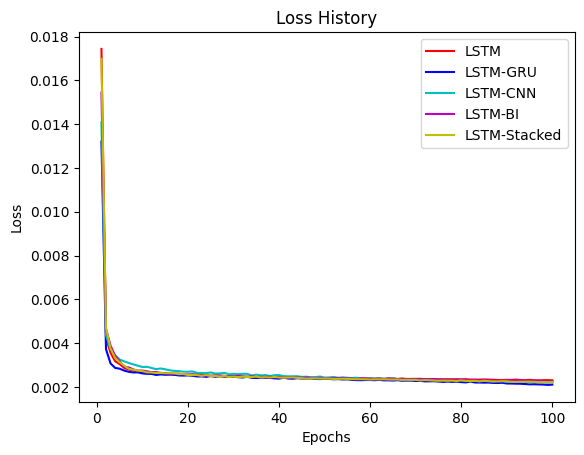

In [ ]:
# Melatih model dengan mencatat loss validation setiap epoch
#history = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=100, batch_size=32, verbose=1)

# Mendapatkan data loss dari history
loss_LSTM = history_LSTM.history['loss']
#loss_Attention_LSTM  = history_Attention_LSTM.history['loss']
loss_GRU_LSTM  = history_GRU_LSTM.history['loss']
loss_CNN_LSTM  = history_CNN_LSTM.history['loss']
loss_BI_LSTM  = history_BI_LSTM.history['loss']
loss_Stacked_LSTM  = history_Stacked_LSTM.history['loss']

#val_loss = history_LSTM.history['val_loss']

# Menampilkan grafik loss validation
import matplotlib.pyplot as plt

epochs = range(1, 100 + 1)

plt.plot(epochs, loss_LSTM, 'r', label='LSTM')
#plt.plot(epochs, loss_Attention_LSTM, 'g', label='LSTM-Attention')
plt.plot(epochs, loss_GRU_LSTM, 'b', label='LSTM-GRU')
plt.plot(epochs, loss_CNN_LSTM, 'c', label='LSTM-CNN')
plt.plot(epochs, loss_BI_LSTM, 'm', label='LSTM-BI')
plt.plot(epochs, loss_Stacked_LSTM, 'y', label='LSTM-Stacked')



plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Mendapatkan nilai loss di awal epoch
start_loss_LSTM = loss_LSTM[0]
start_loss_GRU_LSTM = loss_GRU_LSTM[0]
start_loss_CNN_LSTM = loss_CNN_LSTM[0]
start_loss_BI_LSTM = loss_BI_LSTM[0]
start_loss_Stacked_LSTM = loss_Stacked_LSTM[0]

# Mendapatkan nilai loss di akhir epoch
end_loss_LSTM = loss_LSTM[-1]
end_loss_GRU_LSTM = loss_GRU_LSTM[-1]
end_loss_CNN_LSTM = loss_CNN_LSTM[-1]
end_loss_BI_LSTM = loss_BI_LSTM[-1]
end_loss_Stacked_LSTM = loss_Stacked_LSTM[-1]

# Membuat tabel
import pandas as pd

data = {
    'Algoritma': ['LSTM', 'LSTM-GRU', 'LSTM-CNN', 'LSTM-BI', 'LSTM-Stacked'],
    'Loss Awal Epoch': [start_loss_LSTM, start_loss_GRU_LSTM, start_loss_CNN_LSTM, start_loss_BI_LSTM, start_loss_Stacked_LSTM],
    'Loss Akhir Epoch': [end_loss_LSTM, end_loss_GRU_LSTM, end_loss_CNN_LSTM, end_loss_BI_LSTM, end_loss_Stacked_LSTM]
}

df = pd.DataFrame(data)
print(df)


      Algoritma  Loss Awal Epoch  Loss Akhir Epoch
0          LSTM         0.017440          0.002300
1      LSTM-GRU         0.013208          0.002106
2      LSTM-CNN         0.014085          0.002216
3       LSTM-BI         0.015444          0.002259
4  LSTM-Stacked         0.016982          0.002224


In [ ]:
import pandas as pd

data = {
    'Algoritma': ['LSTM', 'LSTM-GRU', 'LSTM-CNN', 'LSTM-BI', 'LSTM-Stacked'],
    'Loss Awal Epoch': [start_loss_LSTM, start_loss_GRU_LSTM, start_loss_CNN_LSTM, start_loss_BI_LSTM, start_loss_Stacked_LSTM]
}

df = pd.DataFrame(data)
df_sorted = df.sort_values(by='Loss Awal Epoch', ascending=False)

print(df_sorted)

      Algoritma  Loss Awal Epoch
0          LSTM         0.017440
4  LSTM-Stacked         0.016982
3       LSTM-BI         0.015444
2      LSTM-CNN         0.014085
1      LSTM-GRU         0.013208


In [ ]:
import pandas as pd

data = {
    'Algoritma': ['LSTM', 'LSTM-GRU', 'LSTM-CNN', 'LSTM-BI', 'LSTM-Stacked'],
    'Loss Akhir Epoch': [end_loss_LSTM, end_loss_GRU_LSTM, end_loss_CNN_LSTM, end_loss_BI_LSTM, end_loss_Stacked_LSTM]
}

df = pd.DataFrame(data)
df_sorted = df.sort_values(by='Loss Akhir Epoch', ascending=False)

print(df_sorted)

      Algoritma  Loss Akhir Epoch
0          LSTM          0.002300
3       LSTM-BI          0.002259
4  LSTM-Stacked          0.002224
2      LSTM-CNN          0.002216
1      LSTM-GRU          0.002106


# Arsip

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Repeat the above steps for Stacked-LSTM and other algorithms
Stacked_lstm_actual = test_data[timesteps:]
Stacked_lstm_predicted = predicted
Stacked_lstm_mae = mean_absolute_error(Stacked_lstm_actual, Stacked_lstm_predicted)
Stacked_lstm_mse = mean_squared_error(Stacked_lstm_actual, Stacked_lstm_predicted)
Stacked_lstm_rmse = math.sqrt(Stacked_lstm_mse)
Stacked_lstm_cv = Stacked_lstm_mae / Stacked_lstm_actual.mean()
results.loc[5] = ['Stacked-LSTM',
                  Stacked_lstm_mae,
                  Stacked_lstm_mse,
                  Stacked_lstm_rmse,
                  Stacked_lstm_cv]

# Display the results print(results) Change "Stacked" to "Stacked"
print(results)

ValueError: ignored

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=['Algorithm', 'MAE', 'MSE', 'RMSE', 'CV Predicted', 'CV Actual'])

# Repeat the below steps for each algorithm

# Stacked-LSTM
Stacked_lstm_actual = test_data[timesteps:]
Stacked_lstm_predicted = predicted
Stacked_lstm_mae = mean_absolute_error(Stacked_lstm_actual, Stacked_lstm_predicted)
Stacked_lstm_mse = mean_squared_error(Stacked_lstm_actual, Stacked_lstm_predicted)
Stacked_lstm_rmse = math.sqrt(Stacked_lstm_mse)
Stacked_lstm_cv_predicted = Stacked_lstm_mae / Stacked_lstm_predicted.mean()
Stacked_lstm_cv_actual = Stacked_lstm_mae / Stacked_lstm_actual.mean()

results.loc[5] = ['Stacked-LSTM',
                  Stacked_lstm_mae,
                  Stacked_lstm_mse,
                  Stacked_lstm_rmse,
                  Stacked_lstm_cv_predicted,
                  Stacked_lstm_cv_actual]

# Repeat the above steps for other algorithms

# Display the results
print(results)
